# Excercice 2


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import random

# STAN
from cmdstanpy import CmdStanModel

In [25]:
F = len("Nicolas")
L = len("Duc")

zeros = [int(0)] * F
ones = [int(1)] * L

# Calculate N
N = int(F+L)

data = zeros + ones

# dataset={}

# # Create dataset
# for n in range(N):
#     random.shuffle(data)
#     dataset[n] = data
random.shuffle(data)
dataset = dict(N=N, y=data)

print(dataset)

{'N': 10, 'y': [0, 1, 1, 0, 0, 0, 0, 0, 0, 1]}


In [26]:
# https://cmdstanpy.readthedocs.io/en/stable-0.9.65/sample.html#example-fit-model-sampler-defaults

# Create cmdstan model
model = CmdStanModel(stan_file="bern_1.stan")


INFO:cmdstanpy:found newer exe file, not recompiling


In [29]:
model_fit = model.sample(data=dataset)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


(array([110., 427., 767., 901., 763., 545., 304., 136.,  33.,  14.]),
 array([0.0357175 , 0.11138255, 0.1870476 , 0.26271265, 0.3383777 ,
        0.41404275, 0.4897078 , 0.56537285, 0.6410379 , 0.71670295,
        0.792368  ]),
 <BarContainer object of 10 artists>)

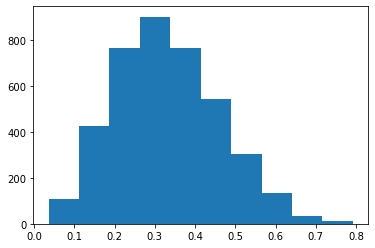

In [33]:
theta = model_fit.stan_variable('theta')
plt.hist(theta)

In [32]:
model_fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-8.20,0.0170,0.73,-9.60,-7.90,-7.60,1800.0,38000.0,1.0
theta,0.33,0.0034,0.13,0.13,0.32,0.56,1400.0,30000.0,1.0
